In [1]:
import pandas as pd
import sqlite3
import time

   Queries  Spark DataFrame  Spark SQL   MySQL
0  Query 1            53165      53142  117073
1  Query 2            51932      52687  116019
2  Query 3            32862      32975   10016
3  Query 4            41807      41557   53044
4  Query 5            33315      32756    9058


Text(0, 0.5, 'Execution Time [ms]')

<Figure size 640x480 with 0 Axes>

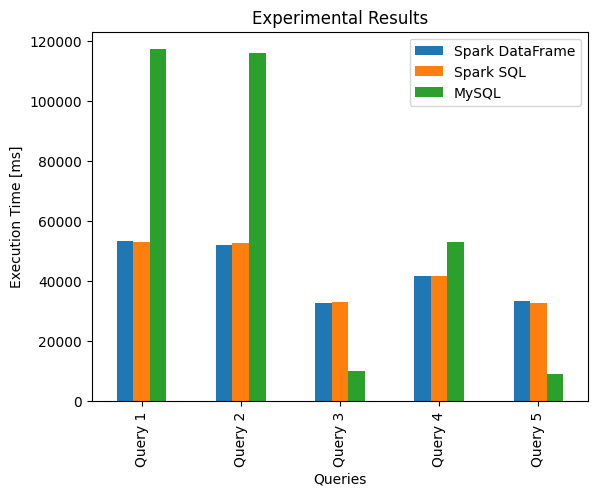

In [7]:
from numpy import log
import matplotlib.pyplot as plt

df = pd.DataFrame([['Query 1', 53165, 53142,117073],
                   ['Query 2', 51932, 52687,116019 ],
                   ['Query 3', 32862, 32975,10016],
                   ['Query 4', 41807, 41557,53044],
                   ['Query 5', 33315, 32756,9058]],
                  columns=['Queries', 'Spark DataFrame', 'Spark SQL', "MySQL"])
print(df)
# plot grouped bar chart
plt.figure()
df.plot(x='Queries',
        kind='bar',
        stacked=False,
        log = False,
        title='Experimental Results')
plt.ylabel('Execution Time [ms]')

Text(0, 0.5, 'Execution Time [ms]')

<Figure size 640x480 with 0 Axes>

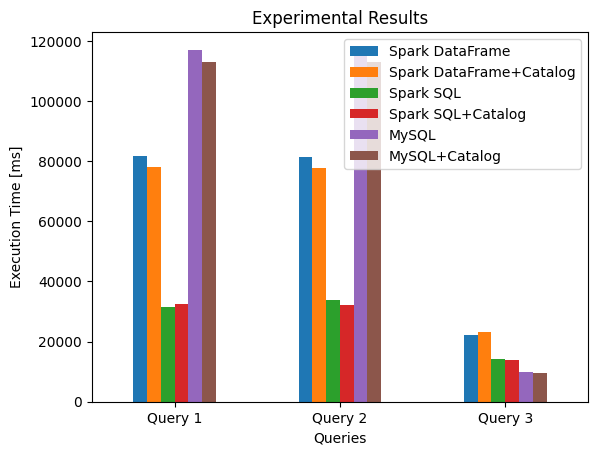

In [23]:
load_time=18296


# ReadAndMergeByDF,YELP,Q1,99910
# ReadAndMergeByDF,YELP,Q2,99741
# ReadAndMergeByDF,YELP,Q3,40348

# ReadAndMergeByDFCatalog,YELP,Q1,96383
# ReadAndMergeByDFCatalog,YELP,Q2,96103
# ReadAndMergeByDFCatalog,YELP,Q3,41620

# ReadAndMergeBySQL,YELP,Q1,49768
# ReadAndMergeBySQL,YELP,Q2,52223
# ReadAndMergeBySQL,YELP,Q3,32417

# ReadAndMergeBySQLCatalog,YELP,Q1,50720
# ReadAndMergeBySQLCatalog,YELP,Q2,50616
# ReadAndMergeBySQLCatalog,YELP,Q3,32061


df = pd.DataFrame([['Query 1', 99910, 96383,49768,50720,117073,112916],
                   ['Query 2', 99741, 96103,52223,50616,116019,112916],
                   ['Query 3', 40348, 41620,32417,32061,10016,9655]],
                  columns=['Queries', 'Spark DataFrame','Spark DataFrame+Catalog', 'Spark SQL', 'Spark SQL+Catalog', "MySQL", "MySQL+Catalog"])

df["Spark DataFrame"] -=load_time
df["Spark DataFrame+Catalog"] -=load_time
df["Spark SQL"] -=load_time
df["Spark SQL+Catalog"] -=load_time



# plot grouped bar chart
plt.figure()
df.plot(x='Queries',
        kind='bar',
        stacked=False,
        log = False,
        rot=0,
        title='Experimental Results')
plt.ylabel('Execution Time [ms]')

Text(0, 0.5, 'Execution Time [ms]')

<Figure size 640x480 with 0 Axes>

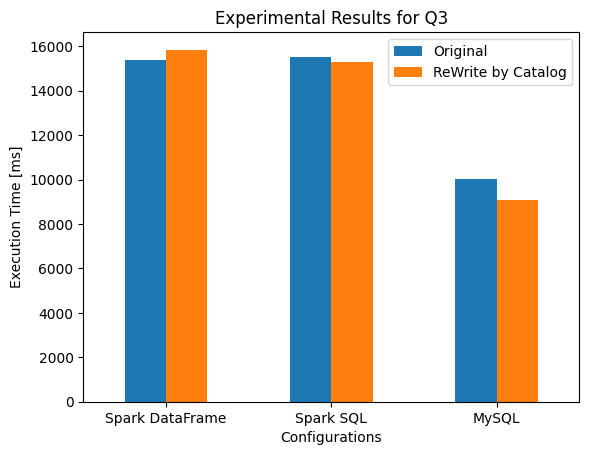

In [18]:

df = pd.DataFrame([['Spark DataFrame', 32862-load_time, 33315-load_time],
                   ['Spark SQL', 32975-load_time, 32756-load_time ],
                   ['MySQL', 10016, 9058]],
                    columns=['Configurations',"Original","ReWrite by Catalog"]
                  )
# plot grouped bar chart
plt.figure()
df.plot(x='Configurations',
        kind='bar',
        stacked=False,
        log = False,
        rot=0,
        title='Experimental Results for Q3')
plt.ylabel('Execution Time [ms]')